# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [6]:
import time
def take5(num = 3):
    for i in range(num):
        print(i)
        time.sleep(5)
        
        

In [7]:
take5()

0
1
2


In [3]:
act = pd.read_csv('../data/act.csv', index_col = 0)
sat = pd.read_csv('../data/sat.csv', index_col = 0)

##### 2. Print the first ten rows of each dataframe.

In [4]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

The first two coulumns in each dataframe are state name and participation rate in that state for the corresponding test.  

The following columns in the `act` dataframe are average scores for the English, Math, Reading, Science and Composite scores for the state.  

The last three columns in the `sat` data frame are average Reading/Writing, Math, and Total Score for each State

##### 4. Does the data look complete? Are there any obvious issues with the observations?

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null

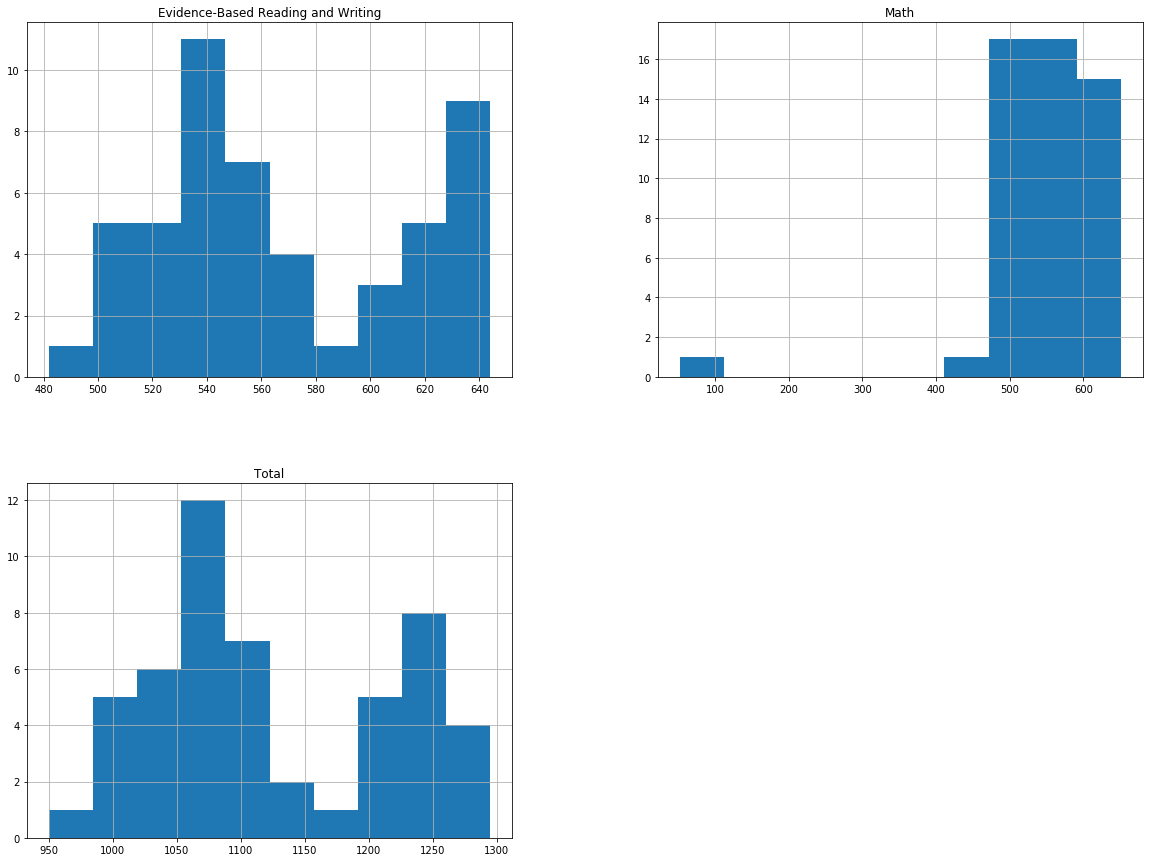

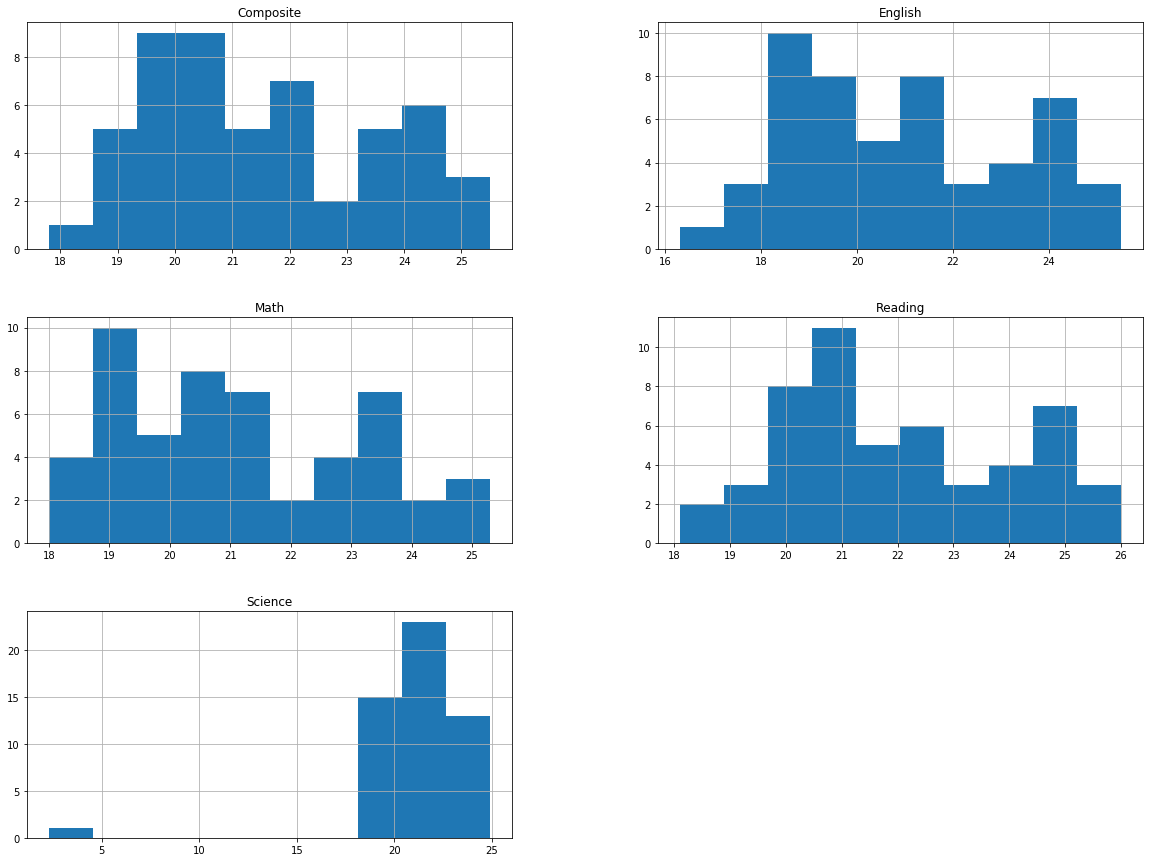

In [5]:
print(sat.isnull().sum())
print(act.isnull().sum())

print(sat.info())
print(act.info())

sat.hist(bins = 10, figsize=(20,15));
act.hist(bins = 10, figsize=(20,15));

The data looks complete (no nulls). However, it appears as if there are some abnormally low Math and Science Scores from the SAT/ACT respectively.  

The two data sets have different numbers of observations. While there would be 51-state-level observations expected, the ACT data also includes a National Average.  

*Let's look at the low scores:*

In [6]:
print(sat[sat['Math']<300])
print(act[act['Science']<15])

       State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060
       State Participation  English  Math  Reading  Science  Composite
21  Maryland           28%     23.3  23.1     24.2      2.3       23.6


The corrupted data appears to be from Maryland. Returning to the source (https://blog.prepscholar.com/average-sat-scores-by-state-most-recent) and (https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows). It appears as if the SAT Math score should actually be 524, and the ACT Science should be 23.2.  

Possibly mis-transcription occured?

*Correct data:*

In [7]:
sat.loc[20, 'Math'] = 524
act.loc[21, 'Science'] = 23.2

##### 5. Print the types of each column.

In [8]:
print('SAT:')
print(sat.dtypes)
print('\nACT: ')
print(act.dtypes)

SAT:
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

ACT: 
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

The 'Participation' variable currently exists as an Object instead of a numeric type. The presence of a '%' in the .csv caused this casting.

In [9]:
sat.Participation = sat.Participation.str.replace('%','').astype(int)
act.Participation = act.Participation.str.replace('%','').astype(int)

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [10]:
act_dicts = {c : 
             {act.loc[i].State : act.loc[i].Participation
              for i in act.index }
             for c in act.columns[1:]
            }

sat_dicts = {c : 
             {sat.loc[i].State : sat.loc[i].Participation
              for i in sat.index }
             for c in sat.columns[1:]
            }

*Example of dictionary:*

In [11]:
sat_dicts

{'Evidence-Based Reading and Writing': {'Alabama': 5,
  'Alaska': 38,
  'Arizona': 30,
  'Arkansas': 3,
  'California': 53,
  'Colorado': 11,
  'Connecticut': 100,
  'Delaware': 100,
  'District of Columbia': 100,
  'Florida': 83,
  'Georgia': 61,
  'Hawaii': 55,
  'Idaho': 93,
  'Illinois': 9,
  'Indiana': 63,
  'Iowa': 2,
  'Kansas': 4,
  'Kentucky': 4,
  'Louisiana': 4,
  'Maine': 95,
  'Maryland': 69,
  'Massachusetts': 76,
  'Michigan': 100,
  'Minnesota': 3,
  'Mississippi': 2,
  'Missouri': 3,
  'Montana': 10,
  'Nebraska': 3,
  'Nevada': 26,
  'New Hampshire': 96,
  'New Jersey': 70,
  'New Mexico': 11,
  'New York': 67,
  'North Carolina': 49,
  'North Dakota': 2,
  'Ohio': 12,
  'Oklahoma': 7,
  'Oregon': 43,
  'Pennsylvania': 65,
  'Rhode Island': 71,
  'South Carolina': 50,
  'South Dakota': 3,
  'Tennessee': 5,
  'Texas': 62,
  'Utah': 3,
  'Vermont': 60,
  'Virginia': 65,
  'Washington': 64,
  'West Virginia': 14,
  'Wisconsin': 3,
  'Wyoming': 3},
 'Math': {'Alabama': 5,

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [12]:
act_column_dict = { c : act[c] for c in act.columns}
sat_column_dict = { c : sat[c] for c in sat.columns}

*Example of dict:*

In [13]:
act_column_dict

{'Composite': 0     21.0
 1     19.2
 2     19.8
 3     19.7
 4     19.4
 5     22.8
 6     20.8
 7     25.2
 8     24.1
 9     24.2
 10    19.8
 11    21.4
 12    19.0
 13    22.3
 14    21.4
 15    22.6
 16    21.9
 17    21.7
 18    20.0
 19    19.5
 20    24.3
 21    23.6
 22    25.4
 23    24.1
 24    21.5
 25    18.6
 26    20.4
 27    20.3
 28    21.4
 29    17.8
 30    25.5
 31    23.9
 32    19.7
 33    24.2
 34    19.1
 35    20.3
 36    22.0
 37    19.4
 38    21.8
 39    23.7
 40    24.0
 41    18.7
 42    21.8
 43    19.8
 44    20.7
 45    20.3
 46    23.6
 47    23.8
 48    21.9
 49    20.4
 50    20.5
 51    20.2
 Name: Composite, dtype: float64, 'English': 0     20.3
 1     18.9
 2     18.7
 3     18.6
 4     18.9
 5     22.5
 6     20.1
 7     25.5
 8     24.1
 9     24.4
 10    19.0
 11    21.0
 12    17.8
 13    21.9
 14    21.0
 15    22.0
 16    21.2
 17    21.1
 18    19.6
 19    19.4
 20    24.2
 21    23.3
 22    25.4
 23    24.1
 24    20.4
 25    18.2
 26    

##### 9. Merge the dataframes on the state column.

In [14]:
# Inner Join will dispense of "National" Entry
comb= sat.merge(act, on = 'State', suffixes= ('_SAT', '_ACT'))

print(comb.head())
print(comb.info())

        State  Participation_SAT  Evidence-Based Reading and Writing  \
0     Alabama                  5                                 593   
1      Alaska                 38                                 547   
2     Arizona                 30                                 563   
3    Arkansas                  3                                 614   
4  California                 53                                 531   

   Math_SAT  Total  Participation_ACT  English  Math_ACT  Reading  Science  \
0       572   1165                100     18.9      18.4     19.7     19.4   
1       533   1080                 65     18.7      19.8     20.4     19.9   
2       553   1116                 62     18.6      19.8     20.1     19.8   
3       594   1208                100     18.9      19.0     19.7     19.5   
4       524   1055                 31     22.5      22.7     23.1     22.2   

   Composite  
0       19.2  
1       19.8  
2       19.7  
3       19.4  
4       22.8  
<class '

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [15]:
comb = comb.rename( columns= {})
c = list(comb.columns)

c[2] = 'Reading_SAT'
c[4] = 'Total_SAT'

for i in [6,8,9,10]:
    c[i] = c[i]+'_ACT'
comb.columns = c

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [16]:
comb.describe().loc[['min','max']]

,Participation_SAT,Reading_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
min,2.0,482.0,468.0,950.0,8.0,16.3,18.0,18.1,18.2,17.8
max,100.0,644.0,651.0,1295.0,100.0,25.5,25.3,26.0,24.9,25.5


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [17]:
def standard_deviation(lst):
    diff_sq = [(s-lst.mean())**2 for s in lst]
    
    return ( (1 / len(lst) ) * sum(diff_sq) ) ** (1/2)

sd = [standard_deviation(comb[s]) for s in comb if comb[s].dtype != 'O']
sd

[34.929070766645083,
 45.216970204378661,
 46.65713364485503,
 91.583510567787428,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7222161451443676,
 2.0007860815819889]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [18]:
sd.insert(0,'National')

comb.loc['sd'] = sd

comb = comb.round(2)
comb.tail()

,State,Participation_SAT,Reading_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
47,Washington,64.00,541.00,534.00,1075.00,29.00,20.90,21.90,22.10,22.00,21.9
48,West Virginia,14.00,558.00,528.00,1086.00,69.00,20.00,19.40,21.20,20.50,20.4
49,Wisconsin,3.00,642.00,649.00,1291.00,100.00,19.70,20.40,20.60,20.90,20.5
50,Wyoming,3.00,626.00,604.00,1230.00,100.00,19.40,19.80,20.80,20.60,20.2
sd,National,34.93,45.22,46.66,91.58,31.82,2.33,1.96,2.05,1.72,2.0


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [29]:
comb.sort_values('Math_SAT')

,State,Participation_SAT,Reading_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,22.3
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,24.1
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,24.3
43,Texas,62.0,513.0,507.0,1020.0,45.0,19.5,20.7,21.1,20.9,20.7
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4
36,Oklahoma,7.0,530.0,517.0,1047.0,100.0,18.5,18.8,20.1,19.6,19.4


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [20]:
comb[comb['Participation_SAT'] > 80]

,State,Participation_SAT,Reading_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,22.3
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,24.3
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,24.1
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,25.5


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [21]:
comb = comb.drop(['sd'])

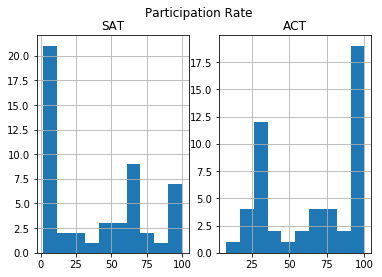

In [22]:
plt.figure(1)
plt.subplot(121)
plt.title('SAT')
comb.Participation_SAT.hist()

plt.subplot(122)
plt.title('ACT')
comb.Participation_ACT.hist()
plt.suptitle('Participation Rate')
plt.show()

##### 17. Plot the Math(s) distributions from both data sets.

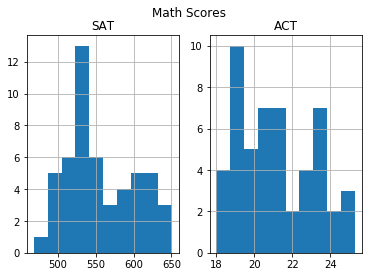

In [23]:
plt.figure(1)
plt.subplot(121)
plt.title('SAT')
comb.Math_SAT.hist()

plt.subplot(122)
plt.title('ACT')
comb.Math_ACT.hist()
plt.suptitle('Math Scores')
plt.show()

##### 18. Plot the Verbal distributions from both data sets.

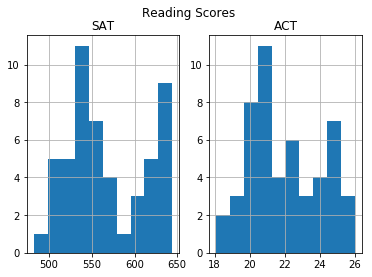

In [24]:
plt.figure(1)
plt.subplot(1,2,1)
plt.title('SAT')
comb.Reading_SAT.hist()

plt.subplot(122)
plt.title('ACT')
comb.Reading_ACT.hist()
plt.suptitle('Reading Scores')
plt.show()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The most common assumption to make about data is that it is normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

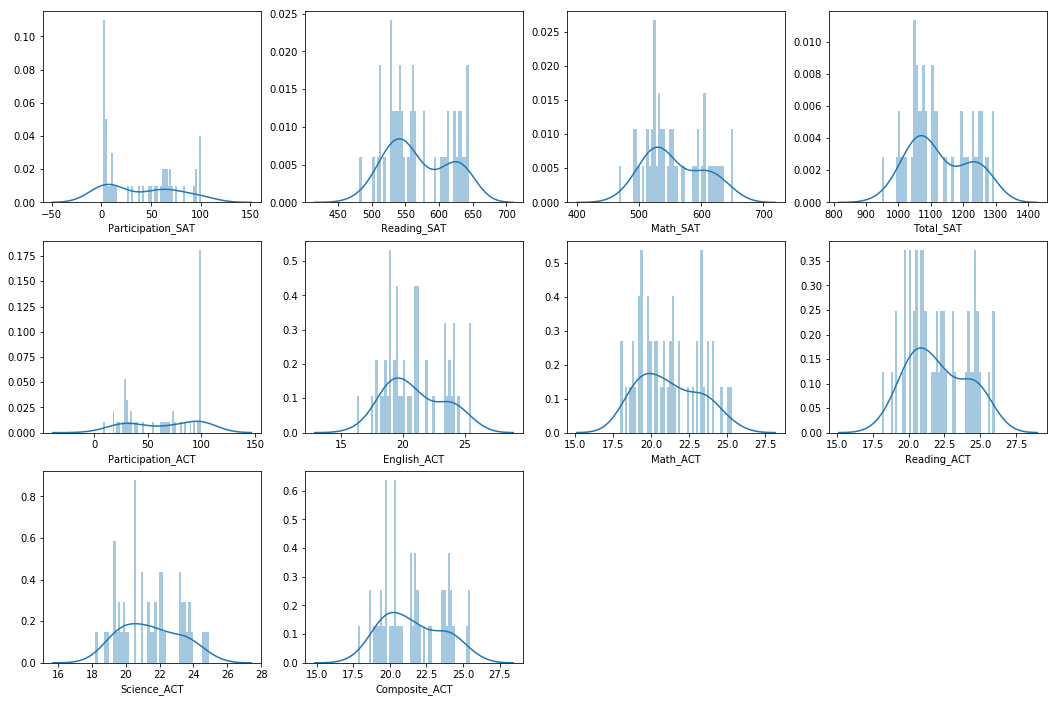

In [32]:
plt.figure(1, figsize=(18,12))
for i in range(1,len(comb.columns)):
    plt.subplot(3,4,i)
    sns.distplot(comb.iloc[:,i], bins = 50, kde = True)
plt.show()

No, none of the distirbutions look normally distributed

In [26]:
[stats.kstest(list(comb[c]),'norm') for c in comb.columns[1:]]

[KstestResult(statistic=0.97724986805182079, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=0.99999999999999933, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0)]

Similarly Kolomogorov-Smirnov tests all suggest that none of the variables are normally distributed.

##### 21. Plot some scatterplots examining relationships between all variables.

In [27]:
def panelPlot(num, slice1, slice2):
    i=1
    plt.figure(num, figsize = (10,10))
    for y in toPlot.iloc[:,slice1]:    
        for x in toPlot.iloc[:,slice2]:
            plt.subplot(5,5,i)
            plt.plot(toPlot[x],toPlot[y], '.')
            if i % 5 == 1:
                plt.ylabel(y)
            if i in range(21,26):
                plt.xlabel(x)
            i+=1

In [28]:
panelPlot(1,slice(1,6), slice(1,6))

plt.suptitle('Panel Plots of all var v. all others')

panelPlot(2,slice(1,6), slice(6,11))
panelPlot(3,slice(6,11), slice(1,6))
panelPlot(4,slice(6,11), slice(6,11))

plt.show()

NameError: name 'toPlot' is not defined

##### 22. Are there any interesting relationships to note?

ACT scores look to be positively correlated to other ACT scores, and SAT scores look to be positively correlated with other SAT scores. This seems unsurprising.  

However, it also appears as if SAT participation is negatively correlated with SAT score and positive correlated with ACT score. Additionally the opposite appears true.

##### 23. Create box plots for each variable. 

In [ ]:
plt.figure(1, figsize = (10,5))
plt.subplot(131)
plt.title('SAT')
comb.iloc[:, 2:5].boxplot()
plt.xticks(rotation = 90)

plt.subplot(132)sns.set()
plt.title('ACT')
comb.iloc[:, 6:].boxplot()
plt.xticks(rotation = 90)

plt.subplot(133)
plt.title('Participation')
comb.loc[:, ['Participation_SAT', 'Participation_ACT']].boxplot()
plt.xticks(rotation = 90)


plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [ ]:
comb.describe().filter(['mean','std'], axis = 0).round(2)

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

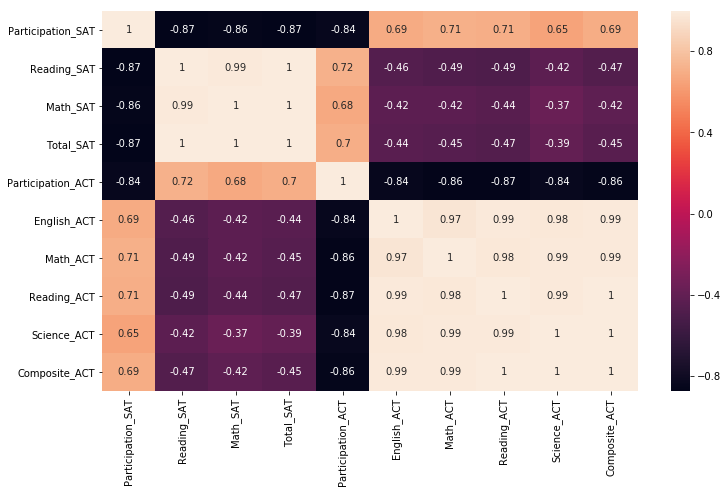

In [30]:
corr = pd.DataFrame(np.corrcoef([comb[c] for c in comb[1:] if comb[c].dtype != 'O']))
corr.index, corr.columns = comb.columns[1:], comb.columns[1:]
plt.figure(1, figsize = (12,7
                        ))
sns.heatmap(corr, annot= True);

As evidenced by the above heatmap, a couple trends in correlation start to emerge. SAT and ACT (partial and whole) correlate EXTREMELY WELL amongst themselves. But, there appears be some negative correlation between SAT and ACT scores.  

In terms of participation, SAT participation is quite negatively strongly correlated with ACT Participation as well as SAT Scores, while being positively correlated with ACT scores. On the other hand, ACT participation is negatively correlated with ACT scores but positively correclated with SAT scores.  

This makes some sense, in that states will tend toward ACT OR SAT, and those students who decide to take the other test will be taking that because they precieve some advantage in taking the other test.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [ ]:
stats.ttest_rel(comb.Participation_SAT, comb.Participation_ACT)

Given a calculated p-value of ~.007, at the 95% confidence level we can reject the null hypothesis that the mean of the two participation rates are equal.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [ ]:
print('SAT Participation 95% ci:',
      stats.t.interval(0.95, len(comb.Participation_SAT)-1,
                       loc = comb.Participation_SAT.mean(),
                       scale = stats.sem(comb.Participation_SAT)))
print('ACT Participation 95% ci:',
      stats.t.interval(0.95, len(comb.Participation_ACT)-1,
                       loc = comb.Participation_ACT.mean(),
                       scale=  stats.sem(comb.Participation_ACT)))

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, there is no overlap over the two confidence intervals which is what we would expect with different means.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

It is not entirely appropriate because the data is not completely independent, which is to say that some students in some states will have taken both tests.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No.  

If the only desire is to understand the data, all we are interested in are the descriptive statistics, rather than those inferential statistics that might be obtained from the data

# Building Graphics for Presentation

In [ ]:
act = pd.read_csv('../data/act.csv', index_col = 0)
sat = pd.read_csv('../data/sat.csv', index_col = 0)
sat.loc[20, 'Math'] = 524
act.loc[21, 'Science'] = 23.2
sat.Participation = sat.Participation.str.replace('%','').astype(int)
act.Participation = act.Participation.str.replace('%','').astype(int)
comb= sat.merge(act, on = 'State', suffixes= ('_SAT', '_ACT'))
comb = comb.rename( columns= {})
c = list(comb.columns)

c[2] = 'Reading_SAT'
c[4] = 'Total_SAT'

for i in [6,8,9,10]:
    c[i] = c[i]+'_ACT'
comb.columns = c
comb['Participation_Total'] = (comb['Participation_ACT']+comb['Participation_SAT'])/200

In [ ]:
Regions = {'NE':
           ['Connecticut', 'Maine', 'Massachusetts',
               'New Hampshire', 'Rhode Island', 'Vermont',
                 'New Jersey', 'New York', 'Pennsylvania'],
           'MW':
           ['Illinois', 'Indiana', 'Michigan','Ohio',
           'Wisconsin','Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska',
           'North Dakota', 'South Dakota'],
           'STH':
           ['Delaware', 'District of Columbia', 'Florida', 'Georgia',
           'Maryland', 'North Carolina', 'South Carolina',
           'Virginia', 'West Virginia', 'Alabama', 'Kentucky',
           'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana',
           'Oklahoma', 'Texas'],
           'WST':
           ['Arizona', 'Colorado', 'Idaho', 'Montana',
           'Nevada', 'New Mexico', 'Utah', 'Wyoming', 
           'Alaska','California', 'Hawaii', 'Oregon',
           'Washington']
          }

toLabel = ['Florida', 'Connecticut', 'Arizona','Massachusetts', 'New Hampshire', 'District of Columbia', 'Wisconsin',
          'Minnesota', 'Iowa', 'Kansas', 'North Carolina', 'South Carolina', 'Michigan', 'New Mexico', 'Nevada', 'Hawaii']



r= []
for k in Regions.keys():
    for s in Regions[k]:
        r.append((s,k))

r= pd.DataFrame(r)
r.columns = ['State', 'Region']
comb2 = comb.merge(r, on = 'State')
comb2['Region_N'] = [0 if r == 'STH'else .6 if r =='WST' else 2 if r == 'MW' else 3 for r in comb2['Region'] ]

In [ ]:
plt.figure(1, figsize = (10,10))
plt.scatter(comb2.Participation_Total, comb2.Total_SAT, marker = 'o', c = comb2.Region_N, cmap='flag')
plt.xlabel('Total Participation', fontsize = 18)
plt.ylabel('SAT Total Score', fontsize = 18)
plt.title('SAT by Total Participation Rate', fontsize = 22)
for label, x, y in zip(toLabel, [comb2[comb2['State']==l].Participation_Total for l in toLabel],
                       [comb2[comb2['State']==l].Total_SAT for l in toLabel]):
    #print(label,x,y)
    plt.annotate(label, xy = (x,y), fontsize = 14)

In [ ]:
plt.figure(1, figsize = (18,12))
i=1
for y in [comb2.Total_SAT, comb2.Composite_ACT]:
    for x in [comb2.Participation_SAT,comb2.Participation_ACT, comb2.Participation_Total]:
        plt.subplot(2,3,i)
        plt.plot(x,y,'o')
        if i % 3 ==1:
            plt.ylabel(y.name, fontsize = 18)
        if i in range(4,7):
            plt.xlabel(x.name,fontsize = 18)
        i+=1
plt.show()

In [ ]:
print(comb[comb['Composite_ACT']>23.9][['State','Total_SAT','Composite_ACT','Participation_Total']])
print(comb[comb['Composite_ACT']<20][['State','Total_SAT','Composite_ACT','Participation_Total']])
print(comb[comb['Total_SAT']<975][['State','Total_SAT','Composite_ACT','Participation_Total']])
print(comb[comb['Total_SAT']>1250][['State','Total_SAT','Composite_ACT','Participation_Total']])

In [ ]:
plt.figure(1, figsize = (18,12))
i=1
for y in [comb2.Total_SAT, comb2.Composite_ACT]:
    for x in [comb2.Math_SAT,comb2.Reading_SAT, comb2.Math_ACT, comb2.Reading_ACT]:
        plt.subplot(2,4,i)
        plt.plot(x,y,'o')
        if i % 4 ==1:
            plt.ylabel(y.name, fontsize = 18)
        if i in range(5,9):
            plt.xlabel(x.name,fontsize = 18)
        i+=1
plt.show()

In [ ]:
def panelPlot(num, slice1, slice2):
    i=1
    plt.figure(num, figsize = (10,10))
    for y in comb.iloc[:,slice1]:    
        for x in comb.iloc[:,slice2]:
            plt.subplot(5,5,i)
            plt.plot(comb[x],comb[y], '.')
            if i % 5 == 1:
                plt.ylabel(y)
            if i in range(21,26):
                plt.xlabel(x)
            i+=1

In [ ]:
plt.figure(1, figsize = (10,10))
plt.scatter(comb2.Participation_Total, comb2.Composite_ACT, marker = 'o', c = comb2.Region_N, cmap='flag')
plt.xlabel('Total Participation', fontsize = 18)
plt.ylabel('ACT Total Score', fontsize = 18)
plt.title('ACT by Total Participation Rate', fontsize = 22)
for label, x, y in zip(toLabel, [comb2[comb2['State']==l].Participation_Total for l in toLabel],
                       [comb2[comb2['State']==l].Composite_ACT for l in toLabel]):
    #print(label,x,y)
    plt.annotate(label, xy = (x,y),xytext=(-5, 5), fontsize = 14, textcoords = 'offset points', ha='right', va='bottom')

In [ ]:
plt.figure(1, figsize = (12,7
                        ))
corrP = corr[['Participation_SAT','Participation_ACT','Participation_Total']]
corrP = corrP.filter(['Total_SAT', 'Composite_ACT'], axis=0)

corrP
#= corr.filter(['Total_SAT','Composite_ACT'])
sns.heatmap(corrP, annot= True)

In [ ]:
plt.figure(1, figsize = (10,10))
plt.scatter(comb2.Participation_Total, comb2.Total_SAT, marker = 'o')
plt.xlabel('Total Participation', fontsize = 18)
plt.ylabel('SAT Total Score', fontsize = 18)
plt.title('SAT by Total Participation Rate', fontsize = 22)

In [ ]:
plt.figure(1, figsize = (10,10))
plt.scatter(comb2.Participation_Total, comb2.Participation_ACT, marker = 'o')
plt.xlabel('Total Participation', fontsize = 18)
plt.ylabel('ACT Total Score', fontsize = 18)
plt.title('ACT by Total Participation Rate', fontsize = 22)

In [ ]:
plt.figure(1, figsize = (12,5))
plt.subplot(131)
plt.title('SAT')
comb2.Participation_SAT.hist()

plt.subplot(132)
plt.title('ACT')
comb2.Participation_ACT.hist()
plt.suptitle('Participation Rate')

plt.subplot(133)
plt.title('Total')
comb2.Participation_Total.hist()
plt.show()